In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars.csv', sep=';', quotechar='"', dtype={'Origin':'category'})

In [3]:
df.head(4)

Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  3433.0          12.0     70     US

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Car           406 non-null    object  
 1   MPG           406 non-null    float64 
 2   Cylinders     406 non-null    int64   
 3   Displacement  406 non-null    float64 
 4   Horsepower    406 non-null    float64 
 5   Weight        406 non-null    float64 
 6   Acceleration  406 non-null    float64 
 7   Model         406 non-null    int64   
 8   Origin        406 non-null    category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 26.0+ KB


In [5]:
# Obtener informacion de la frecuencia absoluta
x = df['Origin'].value_counts()

In [6]:
x

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [7]:
# Obtener informacion de la frecuencia absoluta, y la serie de datos transformada a dataframe 
x = df['Origin'].value_counts().to_frame()

In [8]:
x

Origin
US         254
Japan       79
Europe      73

In [9]:
total = x['Origin'].sum()

In [10]:
total

406

In [11]:
def freq_relative(x):
    return x/total

In [12]:
def angulo(x):
    return freq_relative(x)*360

In [13]:
freq_relative(x['Origin'])

US        0.625616
Japan     0.194581
Europe    0.179803
Name: Origin, dtype: float64

In [14]:
x = x.assign(freq_relative=freq_relative(x['Origin']))

In [15]:
x = x.assign(angulo=angulo(x['Origin']))

In [16]:
x

Origin  freq_relative      angulo
US         254       0.625616  225.221675
Japan       79       0.194581   70.049261
Europe      73       0.179803   64.729064

In [17]:
x.sum()

Origin           406.0
freq_relative      1.0
angulo           360.0
dtype: float64

In [18]:
x.describe()

Origin  freq_relative      angulo
count    3.000000       3.000000    3.000000
mean   135.333333       0.333333  120.000000
std    102.812126       0.253232   91.163462
min     73.000000       0.179803   64.729064
25%     76.000000       0.187192   67.389163
50%     79.000000       0.194581   70.049261
75%    166.500000       0.410099  147.635468
max    254.000000       0.625616  225.221675

In [19]:
europe = df.groupby('Origin').get_group('Europe')

In [20]:
europe.head(3)

Car   MPG  Cylinders  Displacement  Horsepower  \
10          Citroen DS-21 Pallas   0.0          4         133.0       115.0   
25  Volkswagen 1131 Deluxe Sedan  26.0          4          97.0        46.0   
26                   Peugeot 504  25.0          4         110.0        87.0   

    Weight  Acceleration  Model  Origin  
10  3090.0          17.5     70  Europe  
25  1835.0          20.5     70  Europe  
26  2672.0          17.5     70  Europe

In [21]:
europe.sort_values('Acceleration', axis = 0, ascending = True, inplace = True, na_position = 'last')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
europe.head(3)

Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
210  Volkswagen Rabbit  29.5          4          97.0        71.0  1825.0   
29            BMW 2002  26.0          4         121.0       113.0  2234.0   
249           BMW 320i  21.5          4         121.0       110.0  2600.0   

     Acceleration  Model  Origin  
210          12.2     76  Europe  
29           12.5     70  Europe  
249          12.8     77  Europe

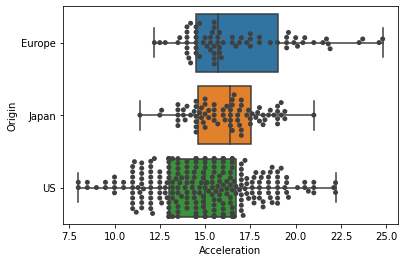

In [23]:
ax = sns.boxplot(x='Acceleration', y='Origin', data=df)
ax = sns.swarmplot(x='Acceleration', y='Origin', data=df, color='.25')

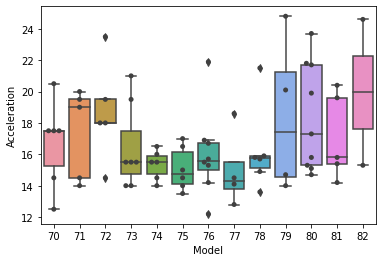

In [24]:
ax = sns.boxplot(x='Model', y='Acceleration', data=europe)
ax = sns.swarmplot(x='Model', y='Acceleration', data=europe, color='.25')

In [25]:
europe72 = europe.groupby('Model').get_group(72)

In [26]:
europe72

Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
83      Volvo 145e (sw)  18.0          4         121.0       112.0  2933.0   
86      Renault 12 (sw)  26.0          4          96.0        69.0  2189.0   
84  Volkswagen 411 (sw)  22.0          4         121.0        76.0  2511.0   
85     Peugeot 504 (sw)  21.0          4         120.0        87.0  2979.0   
66    Volkswagen Type 3  23.0          4          97.0        54.0  2254.0   

    Acceleration  Model  Origin  
83          14.5     72  Europe  
86          18.0     72  Europe  
84          18.0     72  Europe  
85          19.5     72  Europe  
66          23.5     72  Europe

In [27]:
europe72.describe()

MPG  Cylinders  Displacement  Horsepower       Weight  \
count   5.000000        5.0      5.000000    5.000000     5.000000   
mean   22.000000        4.0    111.000000   79.600000  2573.200000   
std     2.915476        0.0     13.247641   21.709445   369.965133   
min    18.000000        4.0     96.000000   54.000000  2189.000000   
25%    21.000000        4.0     97.000000   69.000000  2254.000000   
50%    22.000000        4.0    120.000000   76.000000  2511.000000   
75%    23.000000        4.0    121.000000   87.000000  2933.000000   
max    26.000000        4.0    121.000000  112.000000  2979.000000   

       Acceleration  Model  
count      5.000000    5.0  
mean      18.700000   72.0  
std        3.251923    0.0  
min       14.500000   72.0  
25%       18.000000   72.0  
50%       18.000000   72.0  
75%       19.500000   72.0  
max       23.500000   72.0

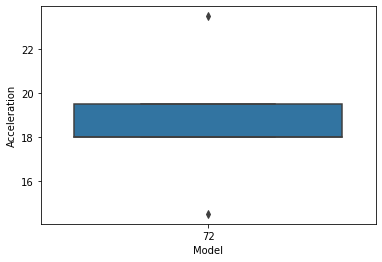

In [28]:
ax = sns.boxplot(x='Model', y='Acceleration', data=europe72)

In [29]:
europe72.mean()

MPG               22.0
Cylinders          4.0
Displacement     111.0
Horsepower        79.6
Weight          2573.2
Acceleration      18.7
Model             72.0
dtype: float64

In [30]:
europe72.std()

MPG               2.915476
Cylinders         0.000000
Displacement     13.247641
Horsepower       21.709445
Weight          369.965133
Acceleration      3.251923
Model             0.000000
dtype: float64

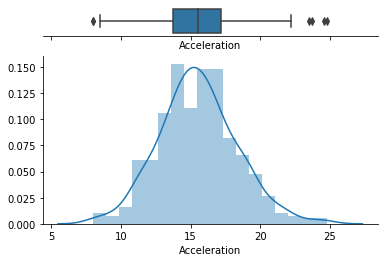

In [31]:
f, (ax_box, ax_hist)= plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(df['Acceleration'], ax=ax_box)
sns.distplot(df['Acceleration'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [32]:
europe72.describe()

MPG  Cylinders  Displacement  Horsepower       Weight  \
count   5.000000        5.0      5.000000    5.000000     5.000000   
mean   22.000000        4.0    111.000000   79.600000  2573.200000   
std     2.915476        0.0     13.247641   21.709445   369.965133   
min    18.000000        4.0     96.000000   54.000000  2189.000000   
25%    21.000000        4.0     97.000000   69.000000  2254.000000   
50%    22.000000        4.0    120.000000   76.000000  2511.000000   
75%    23.000000        4.0    121.000000   87.000000  2933.000000   
max    26.000000        4.0    121.000000  112.000000  2979.000000   

       Acceleration  Model  
count      5.000000    5.0  
mean      18.700000   72.0  
std        3.251923    0.0  
min       14.500000   72.0  
25%       18.000000   72.0  
50%       18.000000   72.0  
75%       19.500000   72.0  
max       23.500000   72.0

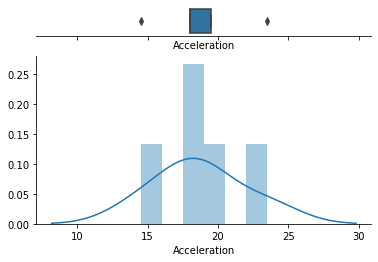

In [33]:
f, (ax_box2, ax_hist2)= plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(europe72['Acceleration'], ax=ax_box2)
sns.distplot(europe72['Acceleration'], ax=ax_hist2)

ax_box2.set(yticks=[])
sns.despine(ax=ax_hist2)
sns.despine(ax=ax_box2, left=True)